# Predicting the sales of each product

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset taken from Kaggle
df = pd.read_csv("/Users/sanjay/Desktop/577_Project/Dataset/DataCoSupplyChainDataset.csv", encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
# Drop unique identifiers that does not affect the predictive modelling
df = df.drop(columns = ['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Latitude', 
                        'Longitude', 'Order Item Cardprod Id', 'Product Card Id', 'Product Description', 
                        'Product Image', 'Customer Street', 'Order City','Customer City','Customer Zipcode', 
                        'Order Zipcode','Product Status', 'Product Category Id'])

In [6]:
# Change the order date and shipping date to date time format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer Country               180519 non-null  object        
 10  Customer Id                    180519 non-null  int64         
 11  

In [8]:
# Checking for null values
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Department Id                    0
Department Name                  0
Market                           0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Ord

# Data analysis

In [9]:
df['Category Name'].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

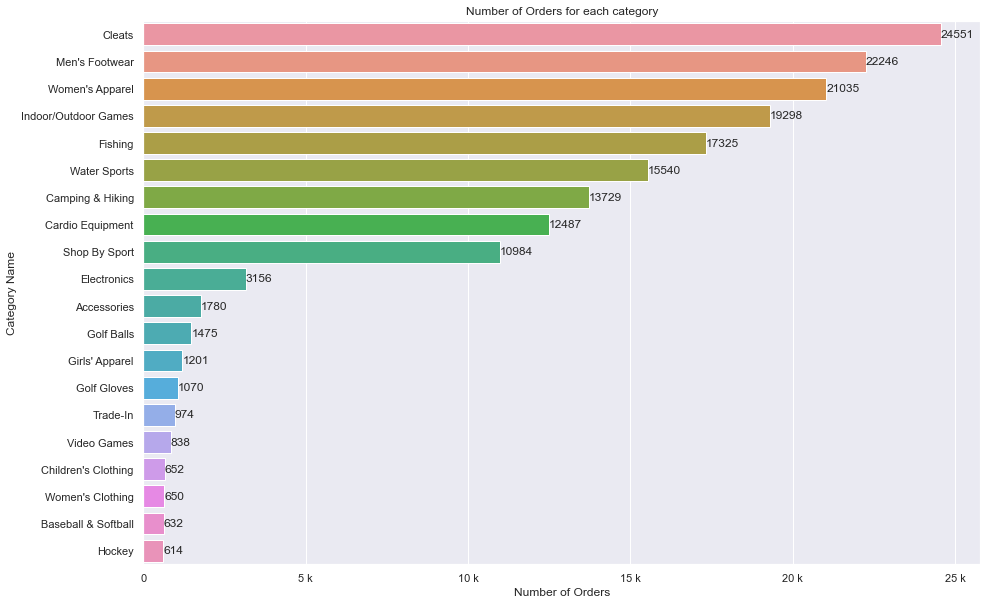

In [10]:
# Number of order of each category
category_name = df.groupby(['Category Name'])['Order Id'].count().reset_index(name = 'Number of Orders').sort_values(by = 'Number of Orders', ascending= False)
sns.set(rc={"figure.figsize":(15, 10)})
ax = sns.barplot(x = category_name['Number of Orders'].head(20), y = category_name['Category Name'].head(20))
ax.set_title('Number of Orders for each category')
for i in ax.containers:
    ax.bar_label(i,)
ax = ax.xaxis.set_major_formatter(ticker.EngFormatter())

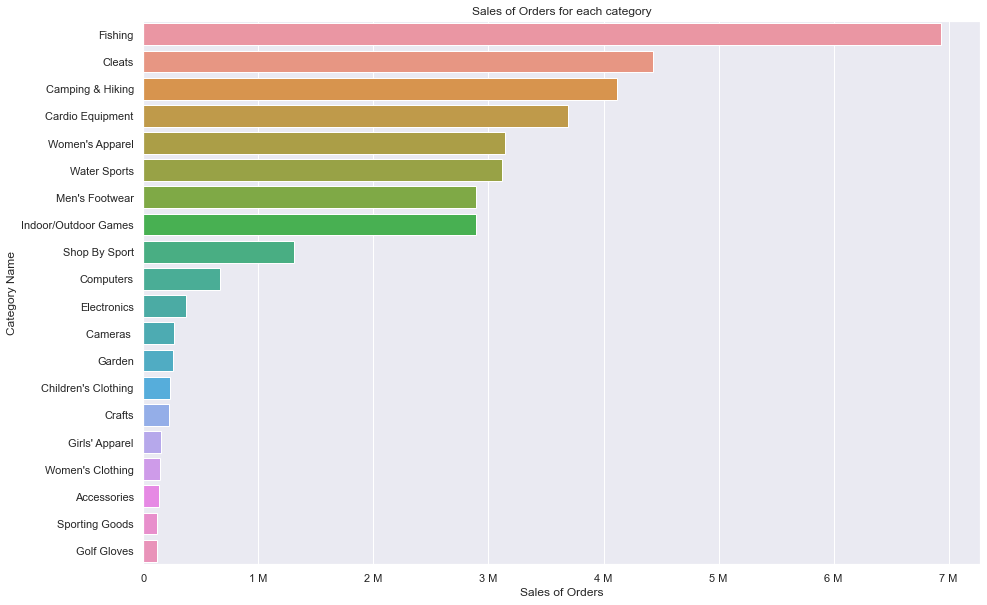

In [11]:
# Sales of orders for each category
category = df.groupby(['Category Name'])['Sales'].sum().reset_index(name = 'Sales of Orders').sort_values(by = 'Sales of Orders', ascending= False)
sns.set(rc={"figure.figsize":(15, 10)})
ax = sns.barplot(x = category['Sales of Orders'].head(20), y = category['Category Name'].head(20))
ax.set_title('Sales of Orders for each category')
ax = ax.xaxis.set_major_formatter(ticker.EngFormatter())

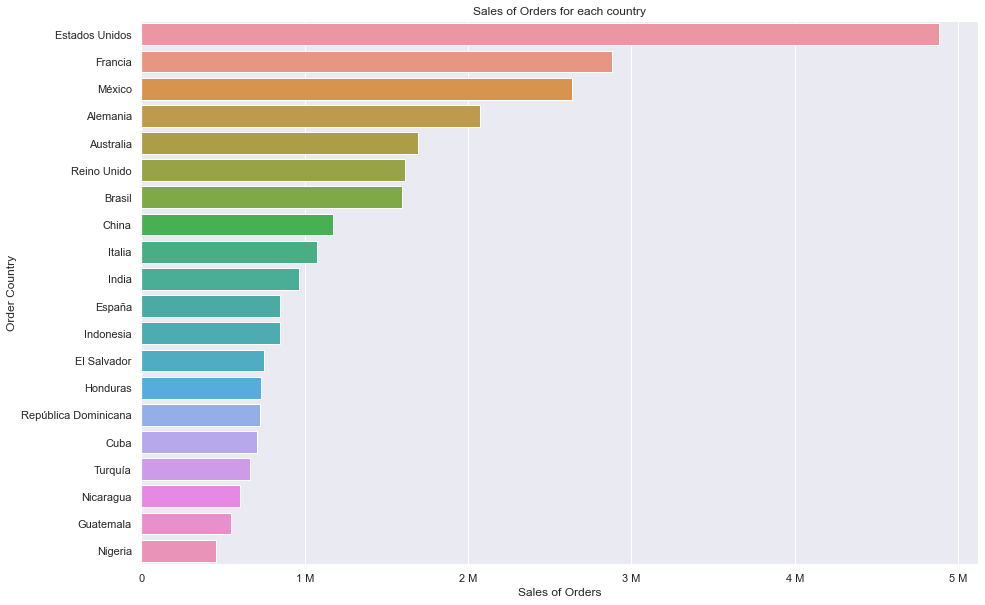

In [12]:
# Sales of Orders for each country
country_sales=df.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by = 'Sales of Orders', ascending = False)
sns.set(rc={"figure.figsize":(15, 10)})
ax = sns.barplot(x = country_sales['Sales of Orders'].head(20), y = country_sales['Order Country'].head(20))
ax.set_title('Sales of Orders for each country')
ax = ax.xaxis.set_major_formatter(ticker.EngFormatter())

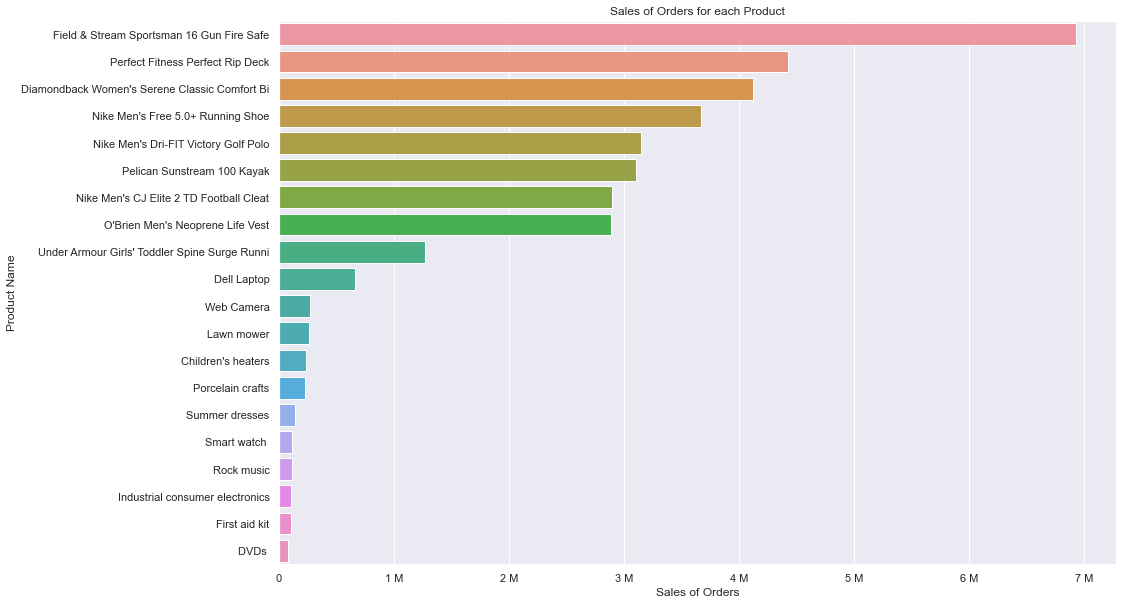

In [13]:
# Sales of orders for each Product
product_sales=df.groupby(['Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by = 'Sales of Orders', ascending = False)
sns.set(rc={"figure.figsize":(15, 10)})
ax = sns.barplot(x = product_sales['Sales of Orders'].head(20), y = product_sales['Product Name'].head(20))
ax.set_title('Sales of Orders for each Product')
ax = ax.xaxis.set_major_formatter(ticker.EngFormatter())

In [14]:
# Creating new dataframe to perform analysis based on Year, Month & Quarters.
order_date = df[['order date (DateOrders)','Sales']]
order_date['orderdate'] = pd.to_datetime(order_date['order date (DateOrders)'])

In [15]:
order_date['Quarter'] = order_date['order date (DateOrders)'].dt.quarter
order_date['Month'] = order_date['order date (DateOrders)'].dt.month
order_date['Year'] = order_date['order date (DateOrders)'].dt.year

In [16]:
order_date

,order date (DateOrders),Sales,orderdate,Quarter,Month,Year
0,2018-01-31 22:56:00,327.750000,2018-01-31 22:56:00,1,1,2018
1,2018-01-13 12:27:00,327.750000,2018-01-13 12:27:00,1,1,2018
2,2018-01-13 12:06:00,327.750000,2018-01-13 12:06:00,1,1,2018
3,2018-01-13 11:45:00,327.750000,2018-01-13 11:45:00,1,1,2018
4,2018-01-13 11:24:00,327.750000,2018-01-13 11:24:00,1,1,2018
...,...,...,...,...,...,...
180514,2016-01-16 03:40:00,399.980011,2016-01-16 03:40:00,1,1,2016
180515,2016-01-16 01:34:00,399.980011,2016-01-16 01:34:00,1,1,2016
180516,2016-01-15 21:00:00,399.980011,2016-01-15 21:00:00,1,1,2016
180517,2016-01-15 20:18:00,399.980011,2016-01-15 20:18:00,1,1,2016


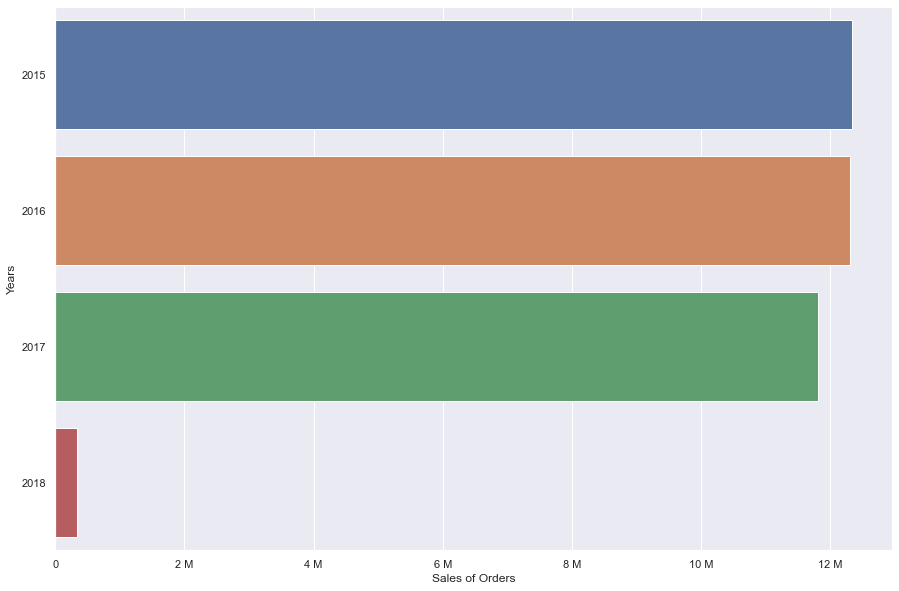

In [17]:
order_date['Years']=order_date['Year'].astype(str)
sales_year=order_date.groupby([ 'Years'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
sns.set(rc={"figure.figsize":(15,10)})
ax = sns.barplot(y = sales_year['Years'], x = sales_year['Sales of Orders'])
ax = ax.xaxis.set_major_formatter(ticker.EngFormatter())

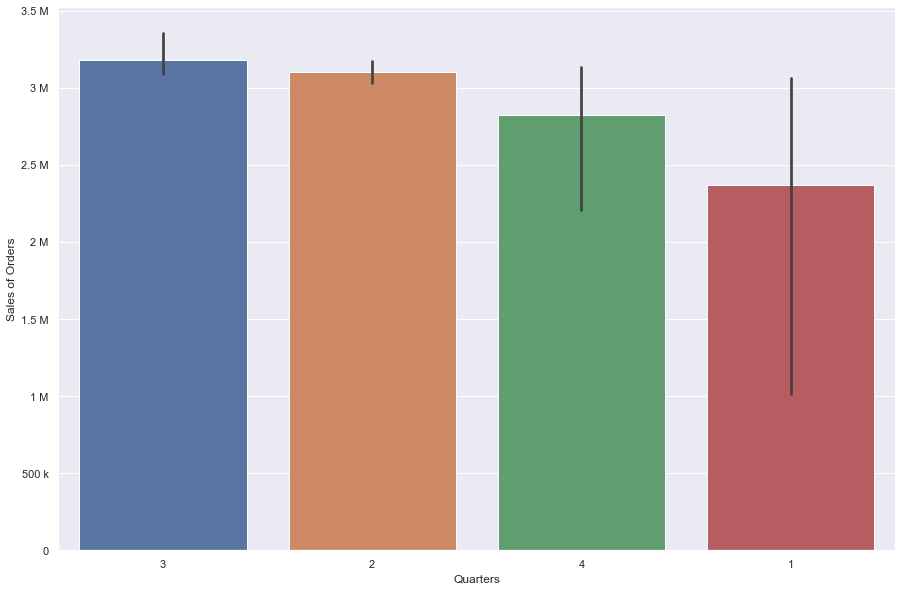

In [18]:
order_date['Quarters']=order_date['Quarter'].astype(str)
sales_quarter=order_date.groupby([ 'Years','Quarters'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(sales_year, x='Sales of Orders',y = 'Years',color ='Sales of Orders')
sns.set(rc={"figure.figsize":(15,10)})
ax = sns.barplot(data = sales_quarter, y = 'Sales of Orders', x = 'Quarters', orient = "v")
ax = ax.yaxis.set_major_formatter(ticker.EngFormatter())

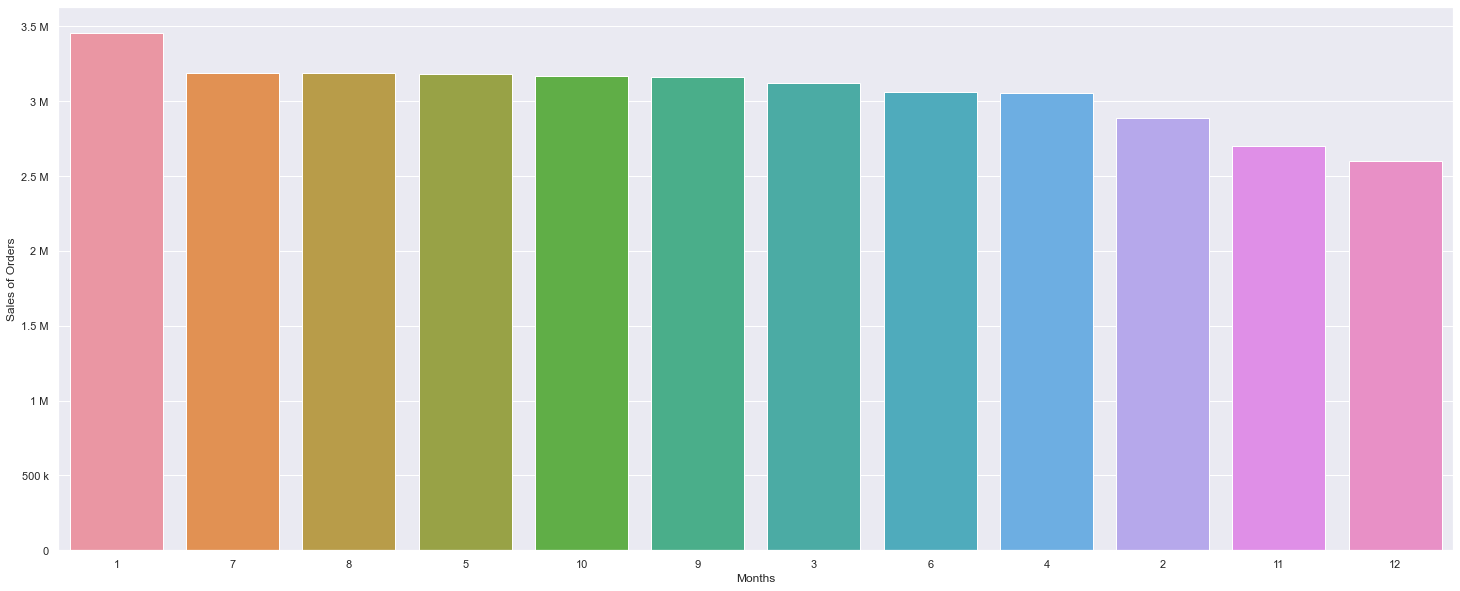

In [19]:
# Sales of orders for each month
order_date['Months']=order_date['Month'].astype(str)
sales_month = order_date.groupby([ 'Quarters', 'Months'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(sales_month, x='Sales of Orders',y = 'Quarters',color ='Months')
sns.set(rc={"figure.figsize":(25, 10)})
ax = sns.barplot(data = sales_month, x='Months',y = 'Sales of Orders')
ax = ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Predict sales of different products

In [20]:
df['Year'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).year
df['Month'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).month

<AxesSubplot:>

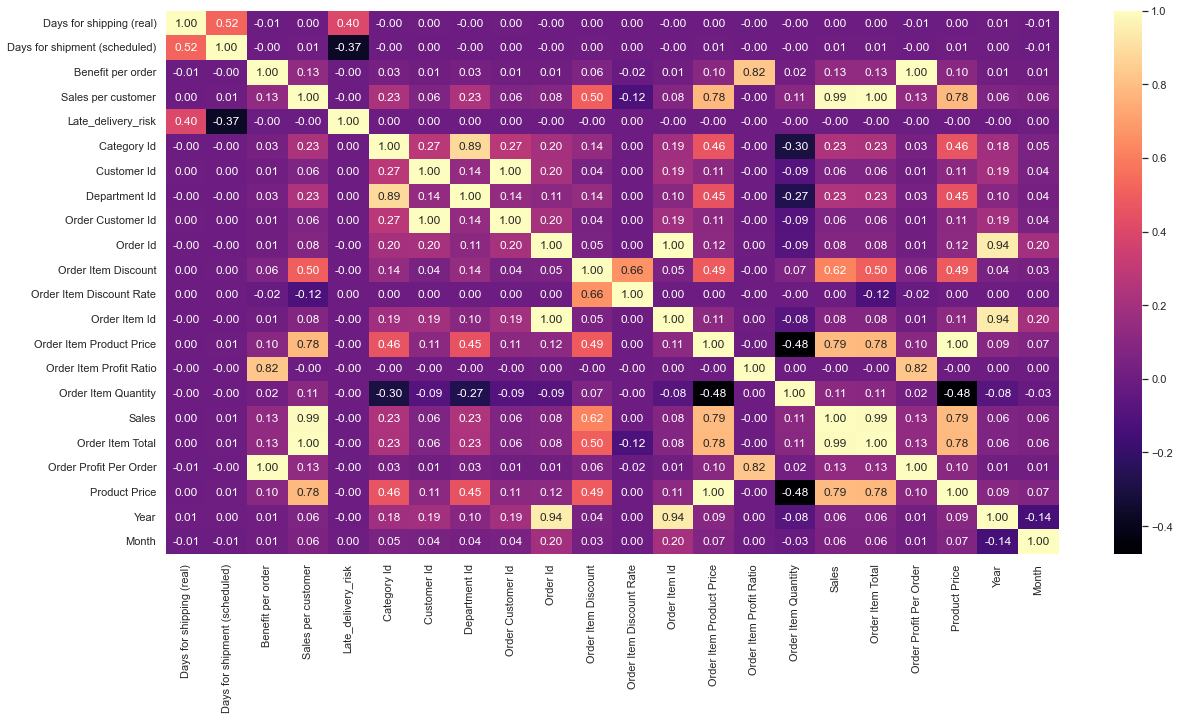

In [21]:
# Plotting correlation matrix to check for multicollinearity
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [22]:
# Drop columns that are highly correlated
df = df.drop(columns = ['Benefit per order', 'Order Item Id', 'Order Customer Id', 'Order Item Total', 'Sales per customer',
                        'Order Item Product Price'])

<AxesSubplot:>

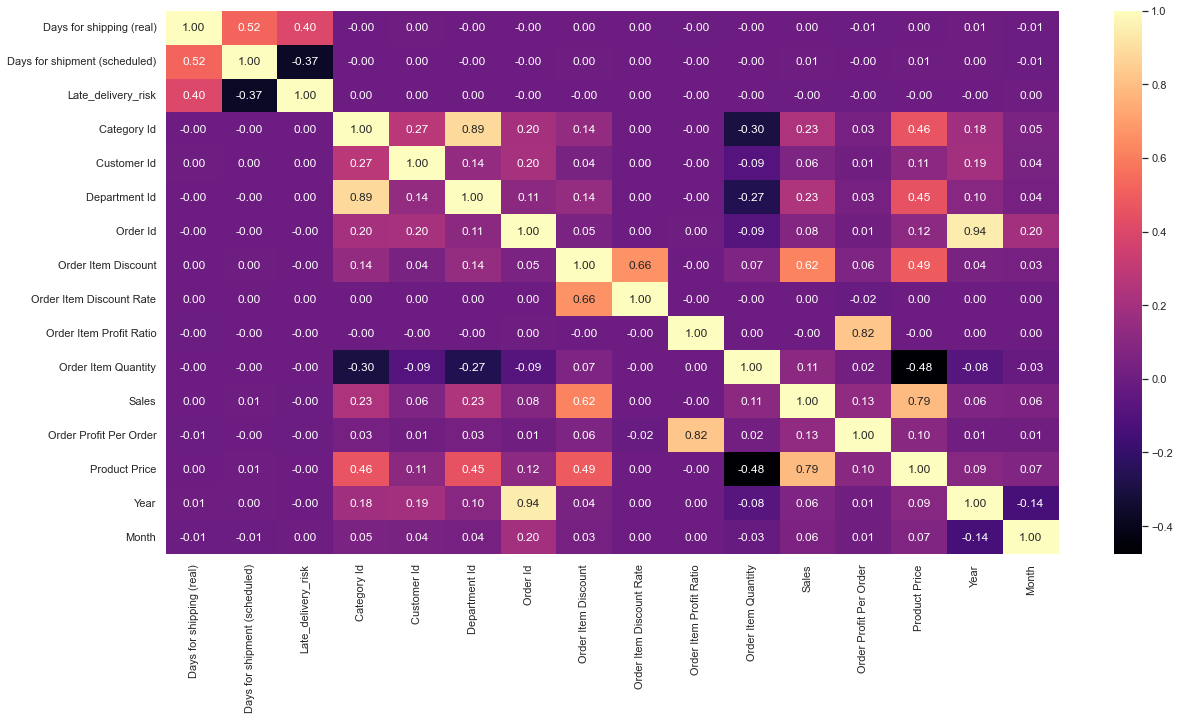

In [23]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [24]:
data_sales = df

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [26]:
target=data_sales['Sales']
features=data_sales.drop(columns=['Sales', 'Order Item Quantity'])

In [27]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer Country,Customer Id,Customer Segment,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Year,Month
0,1,3,3,0,0,47,40,1,20649,0,...,18934,15,475,2,78,62,63628,3,3,1
1,3,5,3,1,1,47,40,1,19386,0,...,2272,13,841,5,78,62,62559,3,3,0
2,0,4,3,3,0,47,40,0,19385,0,...,2293,13,841,1,78,62,62502,3,3,0
3,1,3,3,0,0,47,40,0,19384,2,...,13638,11,835,2,78,62,62434,3,3,0
4,2,2,3,0,0,47,40,1,19383,1,...,20599,11,835,6,78,62,62372,3,3,0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, RANSACRegressor, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [30]:
linear_pipeline = Pipeline([("scaler",StandardScaler()),
                            ("linear_regression",LinearRegression())])
ridge_pipeline = Pipeline([("scaler",StandardScaler()),
                           ("ridge_regressor",Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler",StandardScaler()),
                           ("lasso_regressor",Lasso(random_state = 42))])
random_forest_pipeline = Pipeline([("scaler",StandardScaler()),
                                   ("randomforest_regression",RandomForestRegressor(random_state = 42))])
xgboost_pipeline = Pipeline([("scaler",StandardScaler()),
                            ("xgboost_regression",XGBRegressor())])

In [31]:
pipelines = [linear_pipeline, ridge_pipeline, lasso_pipeline,
            random_forest_pipeline, xgboost_pipeline]

In [32]:
pipelines = [linear_pipeline, ridge_pipeline, lasso_pipeline, random_forest_pipeline, xgboost_pipeline]

In [33]:
pipe_dict = {0: "Linear Regression", 1: "Ridge",
            2: "Lasso", 3: "RandomForest", 4: "XGBoost"}

In [34]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, features,target, cv = 5)
    print(pipe_dict[i], ": ", score.mean())

Linear Regression :  0.7335467196875293
Ridge :  0.7334398355508235
Lasso :  0.7322348361155266
RandomForest :  0.9982265010646951
XGBoost :  0.9976138192552357


### The best tuning parameter based on cross-validation is for XGBoost

In [35]:
grid_params = [    
{"classifier": [XGBRegressor()],
     "classifier__n_estimators": [100,150,200,250,300],
}]

In [36]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", XGBRegressor())])
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [37]:
random_search = RandomizedSearchCV(estimator = pipeline_new, 
                                   param_distributions = grid_params, scoring = 'neg_mean_absolute_error', 
                                   n_jobs= -1, cv = 8, verbose = 10, random_state = 42)

In [38]:
best_model = random_search.fit(X_train, y_train)

Fitting 8 folds for each of 5 candidates, totalling 40 fits
[CV 5/8; 1/5] START classifier=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None), classifier__n_estimators=100
[CV 3/8; 1/5] START classifier=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=

In [39]:
best_model.best_params_

{'classifier__n_estimators': 300,
 'classifier': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)}

In [40]:
pipeline_XGBRegressor = Pipeline([('scaler', StandardScaler()), ('XGBRegressor',  XGBRegressor(importance_type='gain', n_estimators=300, ))])

In [41]:
model = pipeline_XGBRegressor.fit(X_train, y_train)

In [42]:
XGB_train_predict = pd.DataFrame({'Actual train values' : y_train,
                                 'Predicted train values' : model.predict(X_train)})
XGB_train_predict.head()

,Actual train values,Predicted train values
116587,179.970001,184.061401
36340,129.990005,129.344650
175763,129.990005,126.258484
96918,200.000000,195.858109
71197,299.950012,299.664032


In [43]:
XGB_test_predict = pd.DataFrame({'Actual test values' : y_test,
                                 'Predicted test values' : model.predict(X_test)})
XGB_test_predict.head()

,Actual test values,Predicted test values
80120,199.990005,198.102890
19670,250.000000,248.017441
114887,249.899994,249.209167
120110,299.980011,299.942017
56658,119.970001,121.633522


In [44]:
predict = model.predict(X_test)

In [45]:
r2_score(y_test, predict, multioutput='uniform_average')
print("R2 score = ",r2_score(y_test, predict, multioutput='uniform_average'))

R2 score =  0.9989381599553311


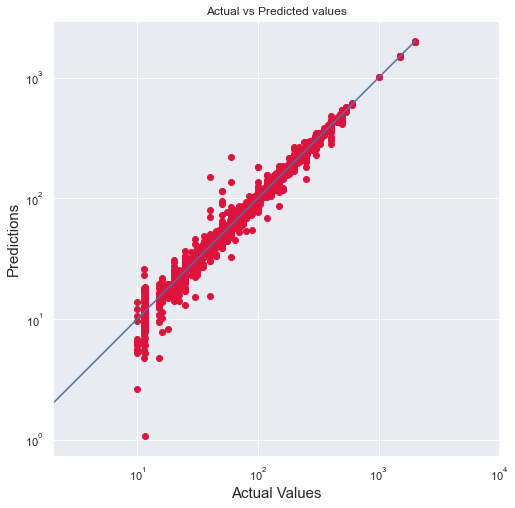

In [46]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict), max(y_test))
p2 = min(min(predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Actual vs Predicted values')
plt.axis('equal')
plt.show()

In [55]:
mea = mean_absolute_error(y_test, predict, multioutput='raw_values')

In [60]:
print("Mean absolute error = ", mea)

Mean absolute error =  [2.02125337]


In [48]:
rms = mean_squared_error(y_test, predict, squared=False)

In [61]:
print("Root mean squared error = ", rms)

Root mean squared error =  4.291073884124101
